# Fitness Exercise Recommendation AI — Exploratory Data Analysis (EDA)

## Big Idea
This project aims to build an AI system that recommends suitable workout routines based on a user’s **BMI (Body Mass Index)** and **BFP (Body Fat Percentage)**.

## Who Will Benefit & Why It Matters
This app benefits people who are new to fitness or unsure what exercises are appropriate for their body composition.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

Matplotlib is building the font cache; this may take a moment.


## Loading the Dataset
Download the dataset from Kaggle and place the CSV in the same folder as this notebook.

In [3]:
df = pd.read_csv('fitness_exercises.csv')
df.head()

,Weight,Height,BMI,Gender,Age,BMIcase,Exercise Recommendation Plan
0,92.085190,1.760250,29.719488,Female,59,over weight,5
1,61.089124,1.595499,23.997776,Female,25,normal,4
2,82.454037,1.816538,24.987499,Female,50,normal,4
3,101.713306,1.790696,31.720047,Female,62,obese,6
4,99.609527,1.969726,25.673756,Male,57,over weight,5


## Dataset Overview

In [5]:
df.shape

(5000, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Weight                        5000 non-null   float64
 1   Height                        5000 non-null   float64
 2   BMI                           5000 non-null   float64
 3   Gender                        5000 non-null   object 
 4   Age                           5000 non-null   int64  
 5   BMIcase                       5000 non-null   object 
 6   Exercise Recommendation Plan  5000 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 273.6+ KB


## Summary Statistics

In [7]:
df.describe()

,Weight,Height,BMI,Age,Exercise Recommendation Plan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,79.760954,1.761265,25.900955,41.956000,4.823400
std,17.359682,0.129611,5.678326,14.030361,1.522589
min,50.002978,1.390171,12.791453,18.000000,1.000000
25%,64.705890,1.703790,21.501848,30.000000,4.000000
50%,79.536451,1.776202,26.314692,42.000000,5.000000
75%,95.102506,1.848437,30.741264,54.000000,6.000000
max,109.998871,1.979633,34.997098,65.000000,7.000000


## Correlation Analysis

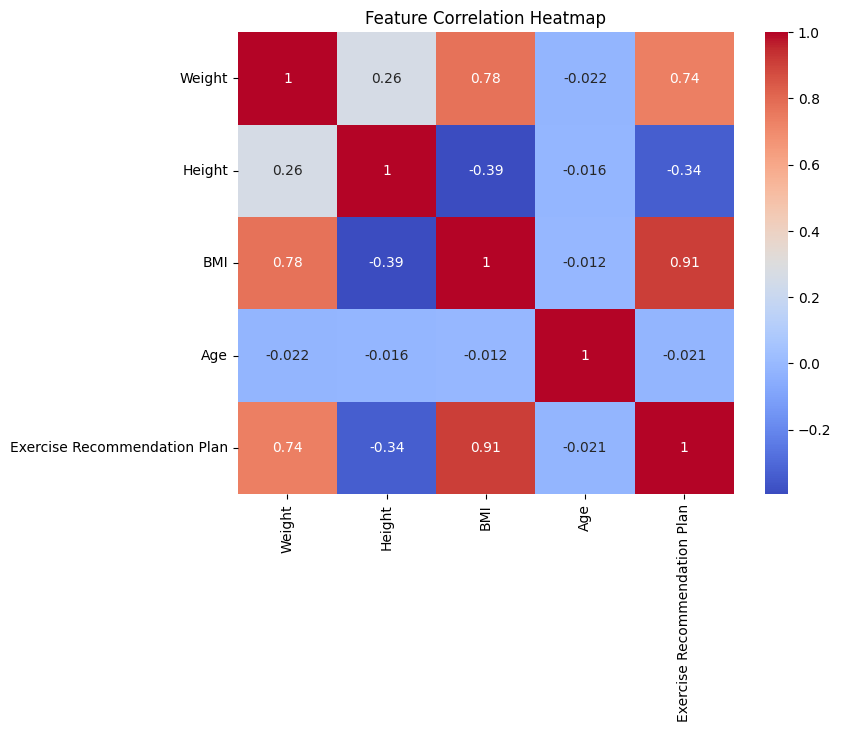

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Data Cleaning

In [9]:
df.isnull().sum()

Weight                          0
Height                          0
BMI                             0
Gender                          0
Age                             0
BMIcase                         0
Exercise Recommendation Plan    0
dtype: int64

In [10]:
df = df.drop_duplicates()
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].mean())

## Feature Engineering

In [11]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(bmi_category)
df.head()

,Weight,Height,BMI,Gender,Age,BMIcase,Exercise Recommendation Plan,BMI_Category
0,92.085190,1.760250,29.719488,Female,59,over weight,5,Overweight
1,61.089124,1.595499,23.997776,Female,25,normal,4,Normal
2,82.454037,1.816538,24.987499,Female,50,normal,4,Normal
3,101.713306,1.790696,31.720047,Female,62,obese,6,Obese
4,99.609527,1.969726,25.673756,Male,57,over weight,5,Overweight


## Visualizations

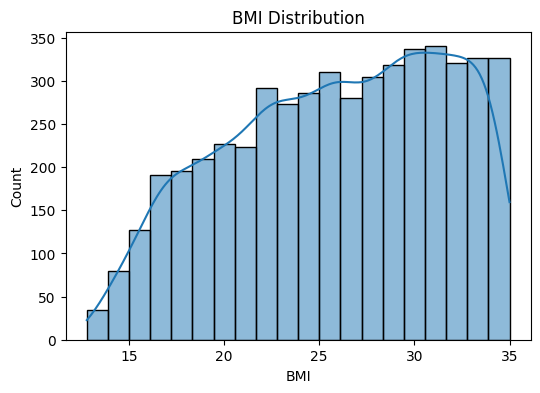

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('BMI Distribution')
plt.show()

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['BFP'], bins=20, kde=True)
plt.title('Body Fat Percentage Distribution')
plt.show()

KeyError: 'BFP'

<Figure size 600x400 with 0 Axes>

## Conclusion
The dataset is suitable for a fitness recommendation AI based on BMI and BFP.